In [53]:
%matplotlib notebook 
import numpy as np
import matplotlib.pyplot as plt

In [54]:
xi,xf,N=-4,4,25
x = np.linspace(xi,xf,N)
y = x.copy()

In [55]:
x

array([-4.        , -3.66666667, -3.33333333, -3.        , -2.66666667,
       -2.33333333, -2.        , -1.66666667, -1.33333333, -1.        ,
       -0.66666667, -0.33333333,  0.        ,  0.33333333,  0.66666667,
        1.        ,  1.33333333,  1.66666667,  2.        ,  2.33333333,
        2.66666667,  3.        ,  3.33333333,  3.66666667,  4.        ])

In [56]:
R=0.02
V=0.02

In [57]:
def Function(x,y):
    for i in range(N):
        if ((x[i])**2+(y[i])**2)!=0:
            return V*x*(1-(R**2/(x[i]**2+y[i]**2)))
        else:
            return 0

In [58]:
z = Function(x,y)

In [59]:
def DerivativeCx(x,y,f,h=0.001):
    return (f(x+h,y)-f(x-h,y))/(2*h)

In [60]:
def DerivativeCy(x,y,f,h=0.001):
    return (f(x,y+h)-f(x,y-h))/(2*h)

In [61]:
def GetVx(x,y,z,h=0.001):
    PartialDerivativex=DerivativeCx(x,y,z,h)
    return PartialDerivativex

In [62]:
def GetVx(x,y,z,h=0.001):
    PartialDerivativey=DerivativeCy(x,y,z,h)
    return -PartialDerivativey

In [63]:
def GetSum(x,y):
    
    Vx = 0.
    Vy = 0.
    
    for i in range(N):
        Vx += GetVx(x,y,z,h)
        Vy += GetVy(x,y,z,h)
        
    return Vx,Vy

In [67]:
def GetField(x,y):
    
    Vx = np.zeros((N,N))
    Vy = np.zeros((N,N))
    
    for i in range(N):
        for j in range(N):
            Vx[i,j],Vy[i,j] = GetSum(x[i],y[j])
            
    return Vx,Vy

<IPython.core.display.Javascript object>


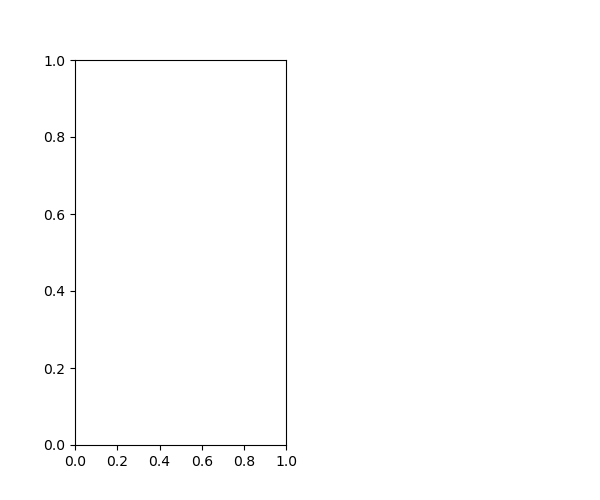

NameError: name 'Vx' is not defined

In [68]:
fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(1,2,1)

for i in range(N):
    for j in range(N):
        ax.quiver(x[i],y[j],Vx[i,j],Vy[i,j],color='r',alpha=0.7)